In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.1.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Dataset

In [4]:
# Processing data line by line using python
processedList = []

path = '/Users/User/Desktop/New Books/Python Machine learning/data_path/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt'
file = open(path,'r')
lines = file.readlines()

for i , line in enumerate(lines):
    try:
        line = line.split(',')
        last = line[5].split(';')[0]
        last = last.strip()
        if last == '':
            break;
        temp = [line[0], line[1], line[3], line[4], last]
        processedList.append(temp)
    except:
        print('Error at line number: ', i)

Error at line number:  281873
Error at line number:  281874
Error at line number:  281875


In [5]:
processedList

[['33', 'Jogging', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '4.903325', '10.882658', '-0.08172209'],
 ['33', 'Jogging', '-0.61291564', '18.496431', '3.0237172'],
 ['33', 'Jogging', '-1.1849703', '12.108489', '7.205164'],
 ['33', 'Jogging', '1.3756552', '-2.4925237', '-6.510526'],
 ['33', 'Jogging', '-0.61291564', '10.56939', '5.706926'],
 ['33', 'Jogging', '-0.50395286', '13.947236', '7.0553403'],
 ['33', 'Jogging', '-8.430995', '11.413852', '5.134871'],
 ['33', 'Jogging', '0.95342433', '1.3756552', '1.6480621'],
 ['33', 'Jogging', '-8.19945', '19.57244', '2.7240696'],
 ['33', 'Jogging', '1.4165162', '5.7886477', '2.982856'],
 ['33', 'Jogging', '-1.879608', '-2.982856', '-0.29964766'],
 ['33', 'Jogging', '-6.1291566', '6.851035', '-8.158588'],
 ['33', 'Jogging', '5.829509', '18.0061', '8.539958'],
 ['33', 'Jogging', '6.2789803', '2.982856', '2.9147544'],
 ['33', 'Jogging', '-1.56634', '8.308413', '-1.4573772

In [13]:
columns = ['user', 'activity','time' ,'x','y']

In [14]:
data = pd.DataFrame(data = processedList, columns = columns)
data.head()

,user,activity,time,x,y
0,33,Jogging,-0.6946377,12.680544,0.50395286
1,33,Jogging,5.012288,11.264028,0.95342433
2,33,Jogging,4.903325,10.882658,-0.08172209
3,33,Jogging,-0.61291564,18.496431,3.0237172
4,33,Jogging,-1.1849703,12.108489,7.205164


In [15]:
data.shape

(343416, 5)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 5 columns):
user        343416 non-null object
activity    343416 non-null object
time        343416 non-null object
x           343416 non-null object
y           343416 non-null object
dtypes: object(5)
memory usage: 13.1+ MB


In [17]:
data.isnull().sum()

user        0
activity    0
time        0
x           0
y           0
dtype: int64

In [18]:
data['activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

# Balance this Data

In [19]:
# Converting string values

data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 5 columns):
user        343416 non-null object
activity    343416 non-null object
time        343416 non-null object
x           343416 non-null float64
y           343416 non-null float64
dtypes: float64(2), object(3)
memory usage: 13.1+ MB


In [21]:
Fs = 20

In [22]:
activities = data['activity'].value_counts()

In [23]:
activities

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

def plot_activity(activity, data):
    fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(15, 7), sharex=True)
    plot_axis(ax0, data['time'], data['x'], 'X-Axis')
    plot_axis(ax1, data['time'], data['y'], 'Y-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in activities:
    data_for_plot = data[(data['activity'] == activity)][:Fs*10]
    plot_activity(activity, data_for_plot)

In [33]:
df = data.drop(['user','time'], axis = 1).copy()
df.head()

,activity,x,y
0,Jogging,12.680544,0.503953
1,Jogging,11.264028,0.953424
2,Jogging,10.882658,-0.081722
3,Jogging,18.496431,3.023717
4,Jogging,12.108489,7.205164


In [34]:
df['activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

In [38]:
# Balanced Data for each activity
Walking = df[df['activity'] == 'Walking'].head(3555).copy()
Jogging = df[df['activity'] == 'Jogging'].head(3555).copy()
Upstairs = df[df['activity'] == 'Upstairs'].head(3555).copy()
Downstairs = df[df['activity'] == 'Downstairs'].head(3555).copy()
Sitting = df[df['activity'] == 'Sitting'].head(3555).copy()
Standing = df[df['activity'] == 'Standing'].copy()

In [39]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Walking, Jogging, Upstairs, Downstairs, Sitting, Standing])
balanced_data.shape

(21330, 3)

In [40]:
balanced_data['activity'].value_counts()

Walking       3555
Sitting       3555
Standing      3555
Upstairs      3555
Downstairs    3555
Jogging       3555
Name: activity, dtype: int64

In [41]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['activity'])
balanced_data.head()

,activity,x,y,label
597,Walking,8.008764,2.792171,5
598,Walking,8.621680,3.786457,5
599,Walking,16.657684,1.307553,5
600,Walking,10.760075,-1.184970,5
601,Walking,9.234595,-0.694638,5


In [42]:
label.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

# Standardized Data

In [43]:
X = balanced_data[['x', 'y']]
y = balanced_data['label']


In [46]:
scaler = StandardScaler()
x = scaler.fit_transform(X)
scaled_x = pd.DataFrame(data =x, columns=['x', 'y'])
scaled_x['label'] = y.values
scaled_x

,x,y,label
0,-0.099190,0.337933,5
1,0.020386,0.633446,5
2,1.588160,-0.103312,5
3,0.437573,-0.844119,5
4,0.139962,-0.698386,5
...,...,...,...
21325,0.178084,0.261019,3
21326,0.193692,0.248875,3
21327,0.197593,0.261019,3
21328,0.049322,0.155768,3


# Frame Preparation

In [48]:
import scipy.stats as stats

Fs = 20

frame_size = Fs*4 #80
hop_size = Fs*2 #40

def get_frames(df, frame_size, hop_size):

    N_FEATURES = 2

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [49]:
X, y = get_frames(scaled_x, frame_size, hop_size)

In [50]:
X.shape, y.shape

((532, 80, 2), (532,))

In [51]:
X_train, X_test, y_trian, y_test = train_test_split(X,y, test_size=0.2, random_state=0, stratify=y)

In [52]:
X_train.shape,X_test.shape

((425, 80, 2), (107, 80, 2))

In [54]:
X_train = X_train.reshape(425,80,2,1)
X_test = X_test.reshape(107,80,2,1)

In [55]:
X_train[0].shape, X_test[0].shape

((80, 2, 1), (80, 2, 1))

# 2D CNN Model

In [62]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(1,1), activation='relu', input_shape=X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(filters=32, kernel_size=(1,1), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))


In [64]:
model.compile(optimizer=Adam(lr=0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [67]:
history = model.fit(X_train, y_trian, epochs=10, validation_data=(X_test, y_test), verbose=1)

Train on 425 samples, validate on 107 samples
Epoch 1/10
425/425 [==============================] - 1s 3ms/sample - loss: 1.7019 - accuracy: 0.2447 - val_loss: 1.4880 - val_accuracy: 0.2710
Epoch 2/10
425/425 [==============================] - 0s 570us/sample - loss: 1.4726 - accuracy: 0.3247 - val_loss: 1.2831 - val_accuracy: 0.5234
Epoch 3/10
425/425 [==============================] - 0s 750us/sample - loss: 1.3027 - accuracy: 0.4471 - val_loss: 1.1160 - val_accuracy: 0.6916
Epoch 4/10
425/425 [==============================] - ETA: 0s - loss: 1.0779 - accuracy: 0.59 - 0s 584us/sample - loss: 1.0660 - accuracy: 0.5953 - val_loss: 0.9247 - val_accuracy: 0.7009
Epoch 5/10
425/425 [==============================] - 0s 554us/sample - loss: 0.8826 - accuracy: 0.6800 - val_loss: 0.7317 - val_accuracy: 0.7103
Epoch 6/10
425/425 [==============================] - 0s 875us/sample - loss: 0.6850 - accuracy: 0.7435 - val_loss: 0.6374 - val_accuracy: 0.7477
Epoch 7/10
425/425 [==================

In [74]:
%matplotlib inline
def plot_learningCurve(history, epochs):# Plot training & validation accuracy values
    epoch_range = range(1, epochs+1):
        plt.plot(epoch_range, history.history['accuracy'])
        plt.plot(epoch_range, history.history['val_accuracy'])
        plt.title('Model accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Val'], loc='upper left')
        plt.show()

  # Plot training & validation loss values
        plt.plot(epoch_range, history.history['loss'])
        plt.plot(epoch_range, history.history['val_loss'])
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Val'], loc='upper left')
        plt.show()

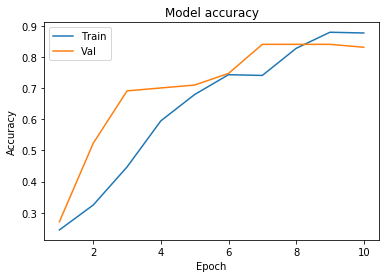

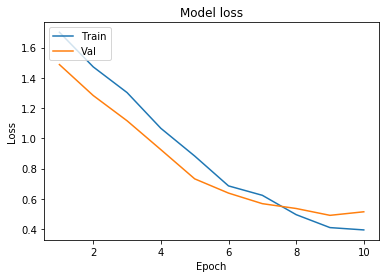

In [75]:
plot_learningCurve(history, 10)

In [70]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [71]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [72]:
y_pred = model.predict_classes(X_test)

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1df2dc56488>)

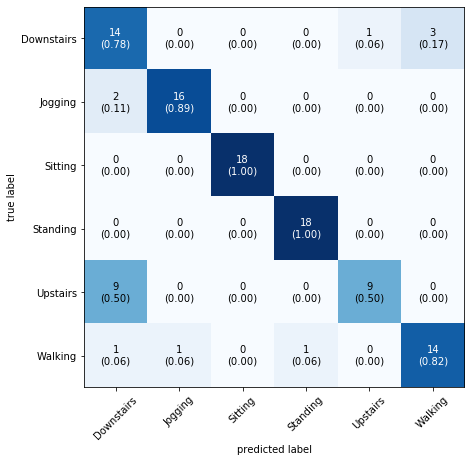

In [73]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_,show_normed=True, figsize=(7,7))